# Eevee Evolution Identifier

In [151]:
import tensorflow as tf
import os # used to navigate through file structures
import matplotlib.pyplot as plt
import cv2
import imghdr
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Example
os.path.join("sessionworkspace", "logs")

'sessionworkspace\\logs'

In [3]:
# listing everything within a folder
os.listdir("C:\\Users\\hoybr\\sessionworkspace\\Deep Learning")

['.ipynb_checkpoints',
 'data',
 'Deep_learning_lab.ipynb',
 'imageclassification',
 'lightning_logs',
 'logs',
 'Pokemon']

## Remove dodgy pictures

In [5]:
# Path to data directory
data_dir = 'data'

In [8]:
# Lists down the folders within the directory
os.listdir(data_dir)

['espeon',
 'flareon',
 'glaceon',
 'jolteon',
 'leafeon',
 'sylveon',
 'umbreon',
 'vaporeon']

In [9]:
# Opening one of the folders in the data directory
os.listdir(os.path.join(data_dir, "espeon"))

['00039-Anything-v4.5-pruned-mergedVae_64769503.jpeg',
 '039652ea7c67c15b3123e699e18182c02a9605a1.jpg',
 '0f89117f70d33802aeb9624be7d8d8ef.png',
 '10196-Shiny-Mega-Espeon.webp',
 '128686.jpg',
 '128781.jpg',
 '196-Espeon.webp',
 '196.png',
 '1962.png',
 '1963.png',
 '1964.png',
 '196espeon1920x1200.jpg',
 '1d0b2-16459750725052-1920.jpg',
 '21731129081_663dd680c5_k.jpg',
 '250px-Sakura_Espeon.png',
 '325.png',
 '356px-PokC3A9dex_Image_Espeon_SV.png',
 '3596.png',
 '3a42e9e5b97e8b33d5448fb0b4942f7603b9fbe0-1920x1080.jpg',
 '4196-Espeon-Shining.webp',
 '62267_Pokemon_Espeon_POP_GLAM-WEB.png',
 '71tL6dwCGTL.jpg',
 '800px-Virgil_Espeon.png',
 '81v0WBwvJYL._AC_UF8941000_QL80_.jpg',
 '84231331229525_29507_29511x20026017.jpg',
 'AF2bZyiSV0-dxC4oJctMfQYnP1XHtl3JwamWAN5c-SHYQwXiLAs64-c-mo.jpg',
 'afkgaming2F2022-052Fc0e31174-b112-44e8-953d-e6a4d09763d52FPU_Espeon_free_event.jpg',
 'bd1cb15a885da7d1617441087c5c44d047897b4b.png',
 'dcab1-16221188821860.png',
 'Eeveelutions.png',
 'EitJnbZXkAAvp2T-

In [6]:
# List of photo extensions
image_ext = ['jpg', 'png', 'jpeg', 'bmp']

In [12]:
# Creating a loop to filter out the dodgy images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)): # looping through every image from each folder
        image_path = os.path.join(data_dir, image_class, image) # creates the full relative directory of the image

        # Removing the image without the extention in list
        try:
            img = cv2.imread(image_path) # opens the image
            tip = imghdr.what(image_path)

            if tip not in image_ext:
                print(f'Image not in extention list: {image_path}')
                os.remove(image_path)

        except Exception as e:
            print(f'Issue with image: {image_path}')

Image not in extention list: data\espeon\espeon-all-shiny-eevee-evolutions-in-pokemon-go-ranked.jpg
Image not in extention list: data\espeon\how-to-draw-Espeon-from-Pokemon-step-0-og.png
Image not in extention list: data\flareon\6ce4a2d65deb064f333b8d7de4a9d239a8614416_00.gif
Image not in extention list: data\glaceon\bad-glaceon_flash_screenshot.gif
Image not in extention list: data\glaceon\glaceon-blue.png
Image not in extention list: data\leafeon\13e2349f2c1eed1250927c36f63c949f2dd2a5af_00.gif
Image not in extention list: data\sylveon\sylveon-all-shiny-eevee-evolutions-in-pokemon-go-ranked.jpg
Image not in extention list: data\umbreon\12-facts-about-umbreon-1689482057.jpg
Image not in extention list: data\vaporeon\f24ba5200639725.Y3JvcCwxNTc1LDEyMzEsMCwxNzE.jpg
Image not in extention list: data\vaporeon\Vaporeon2.png


In [13]:
# Showing the directory
image_path

'data\\vaporeon\\Vaporeon_shiny.png'

In [31]:
# Storing an example image
img = cv2.imread(os.path.join("data", "vaporeon" , "988082.jpg"))

In [32]:
img.shape # 256 x 256 pixels and rgb

(1080, 1920, 3)

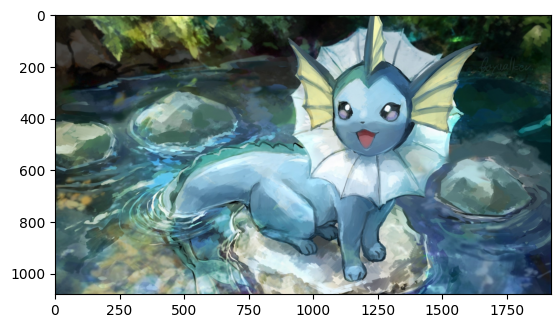

In [35]:
# Plotting the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # this changes the color to RGB rather than BGR

## Loading the data

In [167]:
# Get the class names from the directory structure
class_names = sorted(os.listdir("data"))

In [165]:
class_names

['espeon',
 'flareon',
 'glaceon',
 'jolteon',
 'leafeon',
 'sylveon',
 'umbreon',
 'vaporeon']

In [168]:
# Imports the data and classifies them based on the folder name, while resizing the image, put them into batches and shuffling them
data = tf.keras.utils.image_dataset_from_directory(
    "data",  # Path to the main directory
    labels='inferred',  # Automatically infer labels from subdirectory names
    label_mode='int',  # Can be 'int', 'categorical', or 'binary'
    batch_size=32,  # Number of images to return in each batch
    image_size=(256, 256),  # Resize images to this size
    shuffle=True,  # Shuffle the data
    seed=123,  # Seed for reproducibility
    class_names=class_names  # Provide the sorted class names
)

Found 682 files belonging to 8 classes.


In [170]:
print(data.class_names)

['espeon', 'flareon', 'glaceon', 'jolteon', 'leafeon', 'sylveon', 'umbreon', 'vaporeon']


In [171]:
for images, labels in data.take(1):
    print(images.shape)  # (batch_size, 256, 256, 3)
    print(labels.shape)  # (batch_size,)

(32, 256, 256, 3)
(32,)


In [172]:
# converts the tensorflot dataset to numpy arrays and allows you to iterate over the dataset elements one by one
data_iterator = data.as_numpy_iterator()

In [120]:
# used to retrieve the next batch of data from the iterator
batch = data_iterator.next()

In [121]:
len(batch) # first is the image and the second is the label

2

In [122]:
batch[0].shape # batches has 32 images

(32, 256, 256, 3)

In [123]:
# batch labels
batch[1]

array([4, 2, 7, 1, 6, 0, 1, 4, 0, 3, 7, 7, 1, 1, 4, 3, 4, 0, 2, 5, 0, 5,
       2, 7, 0, 3, 3, 3, 4, 2, 3, 3])

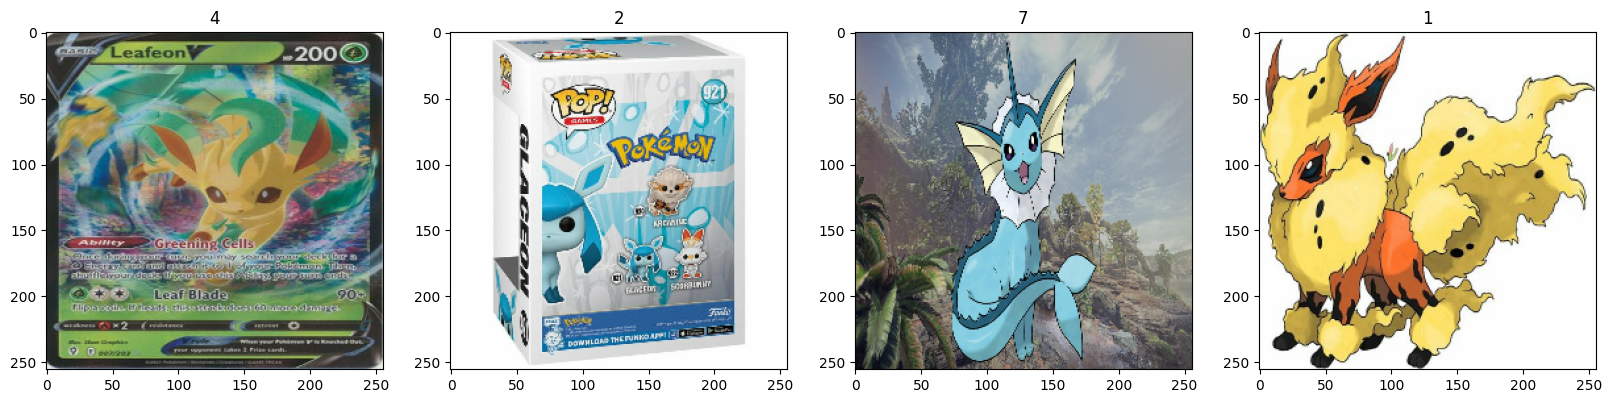

In [124]:
# Displaying the images with their labels
fig, ax=plt.subplots(ncols = 4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessing the data

### Scaling the data

In [173]:
# Assuming you know the number of classes, replace 8 with your actual number of classes
NUM_CLASSES = 8

# Function to normalize images and one-hot encode labels
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize image
    label = tf.one_hot(tf.cast(label, tf.int32), NUM_CLASSES)  # One-hot encode label
    return image, label

In [174]:
# Apply preprocessing to your dataset
data = data.map(preprocess)

In [175]:
scaled_iterator = data.as_numpy_iterator()

In [176]:
batch = scaled_iterator.next()

In [177]:
# Ensuring the max is one
batch[0].max()

1.0

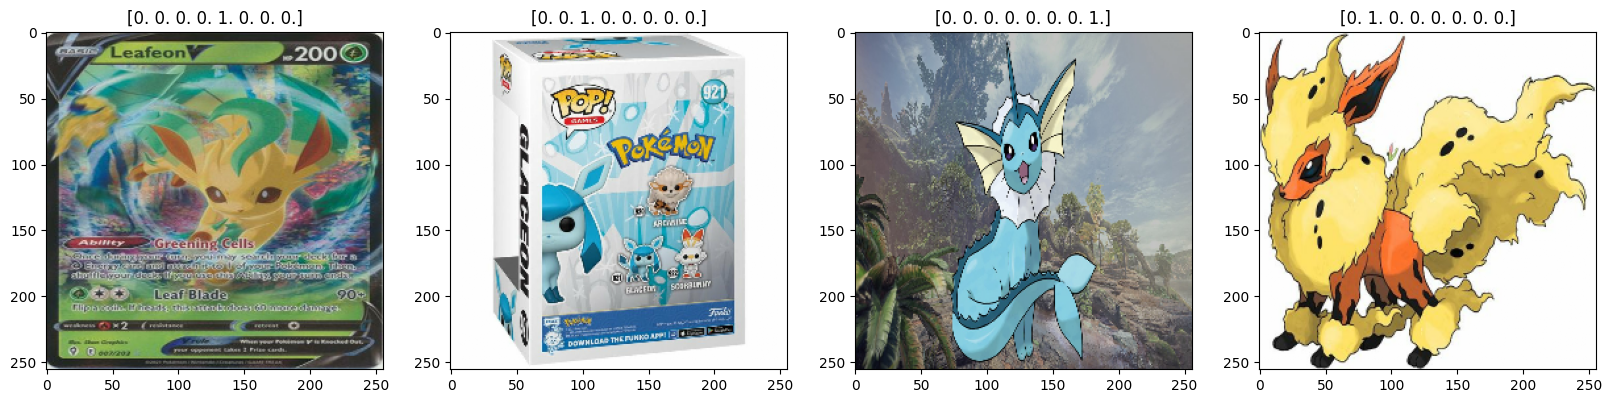

In [178]:
# Visualising the data
fig, ax=plt.subplots(ncols = 4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Spliting the data

In [179]:
# Number of batches
len(data)

22

In [180]:
# Splitting the data into training, testing and validation sets
train_size = int(len(data)*0.7)
test_size = int(len(data)*0.1)
val_size = int(len(data)*0.25)

In [181]:
# Total number of batches when adding them up
train_size+test_size+val_size

22

In [182]:
# Checking the number of batch for each group
train_size, test_size, val_size

(15, 2, 5)

In [183]:
# Splitting the batches
train = data.take(train_size)
validation = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [184]:
# Checking the number of batches
print(len(train))
print(len(validation))
print(len(test))

15
5
2


## Deep Learning

In [193]:
# Creating a model that passes through sequentially
model = Sequential()

In [194]:
# First convolutional layer
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPool2D())

# Second convolutional layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPool2D())

# Third convolutional layer
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPool2D())

# Turning the matrix into a vector
model.add(Flatten())

# First dense layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3)) # added for regularisation to prevent overfitting

# Second dense layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Third dense layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Fourth dense layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(8, activation='softmax'))

In [195]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [196]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │     7,373,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,556,024 (28.82 MB)

 Trainable params: 7,556,024 (28.82 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [197]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

In [198]:
logdir = 'log'

In [199]:
# Saving the model at a specific checkpoint
tensor_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [200]:
# Fitting the model
hist = model.fit(train, epochs=70, validation_data=validation, callbacks=tensor_callback)

Epoch 1/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 646ms/step - accuracy: 0.1052 - loss: 2.1727 - val_accuracy: 0.1562 - val_loss: 2.0497
Epoch 2/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 697ms/step - accuracy: 0.1438 - loss: 2.0313 - val_accuracy: 0.2688 - val_loss: 1.9469
Epoch 3/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 650ms/step - accuracy: 0.2023 - loss: 1.9271 - val_accuracy: 0.2500 - val_loss: 1.8666
Epoch 4/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 618ms/step - accuracy: 0.2867 - loss: 1.8605 - val_accuracy: 0.2875 - val_loss: 1.8127
Epoch 5/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 679ms/step - accuracy: 0.2674 - loss: 1.8067 - val_accuracy: 0.3938 - val_loss: 1.7270
Epoch 6/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 878ms/step - accuracy: 0.3305 - loss: 1.7673 - val_accuracy: 0.4187 - val_loss: 1.5556
Epoch 7/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 683ms/step - accuracy: 0.3425 - loss: 1.6294 - val_accuracy: 0.4375 - val_loss: 1.5866
Epoch 8/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 705ms/step - accuracy: 0.4635 - loss: 1.4843 - val_accu

### Performance

In [201]:
hist.history

{'accuracy': [0.12708333134651184,
  0.15833333134651184,
  0.2291666716337204,
  0.27916666865348816,
  0.26875001192092896,
  0.32499998807907104,
  0.3291666805744171,
  0.4541666805744171,
  0.4479166567325592,
  0.46041667461395264,
  0.5895833373069763,
  0.6416666507720947,
  0.6895833611488342,
  0.7541666626930237,
  0.8062499761581421,
  0.8333333134651184,
  0.8479166626930237,
  0.8812500238418579,
  0.90625,
  0.8812500238418579,
  0.9458333253860474,
  0.9666666388511658,
  0.9729166626930237,
  0.96875,
  0.9479166865348816,
  0.9729166626930237,
  0.981249988079071,
  0.9895833134651184,
  1.0,
  0.9958333373069763,
  0.9937499761581421,
  0.9916666746139526,
  0.9958333373069763,
  0.9958333373069763,
  0.9895833134651184,
  0.9895833134651184,
  0.9895833134651184,
  0.9958333373069763,
  0.9916666746139526,
  0.9895833134651184,
  0.9916666746139526,
  0.9958333373069763,
  0.9916666746139526,
  0.9937499761581421,
  0.9937499761581421,
  0.9958333373069763,
  0.9958

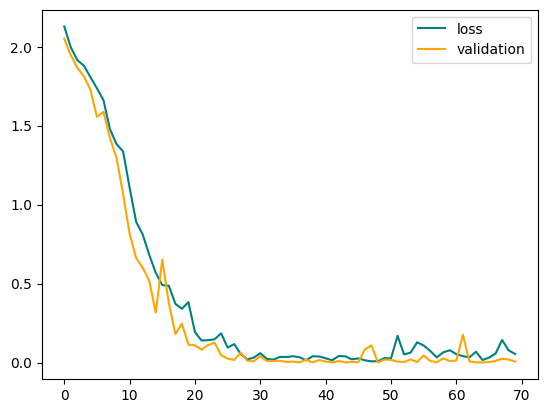

In [202]:
# Plotting the loss performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='validation')
plt.legend()
plt.show()

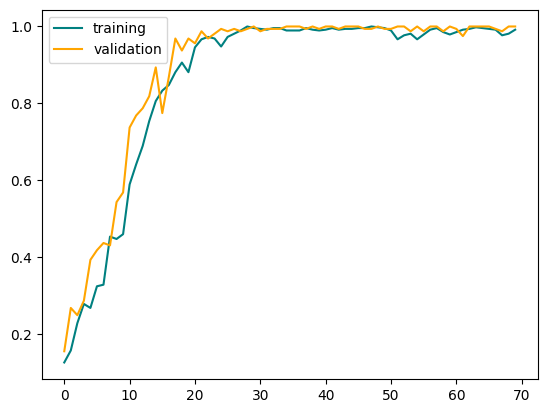

In [204]:
# Plotting the accuracy performance
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='training')
plt.plot(hist.history['val_accuracy'], color='orange', label='validation')
plt.legend()
plt.show()

## Evaluate Performance

In [205]:
from tensorflow.keras.metrics import (
    CategoricalAccuracy,
    TopKCategoricalAccuracy,
    Precision,
    Recall,
    AUC
)

In [206]:
# Establishing instances
CatAcc = CategoricalAccuracy()
TopCatAcc = TopKCategoricalAccuracy()
Pre = Precision()
Rec = Recall()
auc = AUC()

In [207]:
# Looping through the test batch to get the metrics
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    CatAcc.update_state(y,yhat)
    TopCatAcc.update_state(y,yhat)
    Pre.update_state(y, yhat)
    Rec.update_state(y, yhat)
    auc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


In [208]:
# Displaying the results
print(f'Accuracy: {CatAcc.result()}')
print(f'Top Categorical Accuracy: {TopCatAcc.result()}')
print(f'Precision: {Pre.result()}')
print(f'Recall: {Rec.result()}')
print(f'AUC: {auc.result()}')

Accuracy: 1.0
Top Categorical Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC: 1.0


## Testing the model

In [265]:
# Importing the image
vaporeon_img = cv2.imread('glaceon_image.jpg')

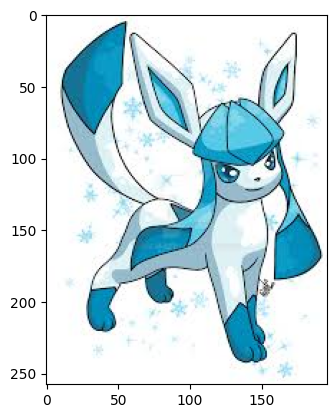

In [266]:
# Displaying the image
plt.imshow(cv2.cvtColor(vaporeon_img, cv2.COLOR_BGR2RGB))

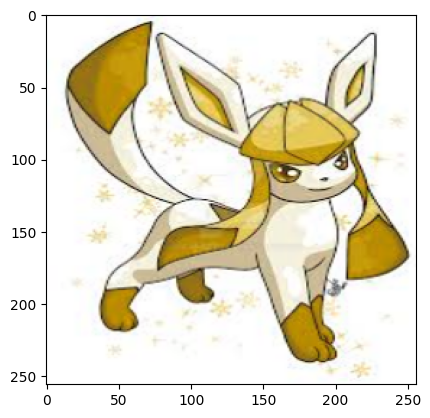

In [267]:
# Resizing the image
vaporeon_imgresize = tf.image.resize(vaporeon_img, (256,256))

# Plotting the image
plt.imshow(vaporeon_imgresize.numpy().astype(int))

In [268]:
# Shape of the image
vaporeon_imgresize.shape

TensorShape([256, 256, 3])

In [269]:
# Putting the image in a batch
np.expand_dims(vaporeon_imgresize, 0).shape

(1, 256, 256, 3)

In [270]:
# Getting the prediction while scaling the image
yhat = model.predict(np.expand_dims(vaporeon_imgresize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [271]:
yhat

array([[0.11068731, 0.12474965, 0.0698875 , 0.07898414, 0.11385144,
        0.07725088, 0.34797475, 0.07661429]], dtype=float32)

In [272]:
# Convert the array to a DataFrame
df = pd.DataFrame(yhat, columns=class_names)

In [273]:
df

,espeon,flareon,glaceon,jolteon,leafeon,sylveon,umbreon,vaporeon
0,0.110687,0.12475,0.069888,0.078984,0.113851,0.077251,0.347975,0.076614
